# Clustering et PCA sur le jeu de données Iris

Exercice d'apprentissage non supervisé sur le jeu de données Iris.
Le but est d'explorer comment fonctionne le clustering (K-Means) et la réduction de dimensions (PCA) sur un dataset populaire.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# 1. Chargement du jeu de données Iris
iris = load_iris()
X = iris.data  # Données (4 features)
y = iris.target  # Labels (Setosa, Versicolour, Virginica) - seulement pour comparer après
feature_names = iris.feature_names

In [ ]:
# 2. Création d'un DataFrame Pandas pour faciliter l'exploration
df = pd.DataFrame(X, columns=feature_names)

In [ ]:
# 3. Aperçu des données
display(df.head())
print("\nDescription statistique:")
print(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Description statistique:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
print("\nInfos sur le DataFrame:")
print(df.info())


Infos sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [ ]:
# 4. Vérification des valeurs manquantes
print("\nVérification des valeurs manquantes:")
print(df.isnull().sum())


Vérification des valeurs manquantes:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# 5. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

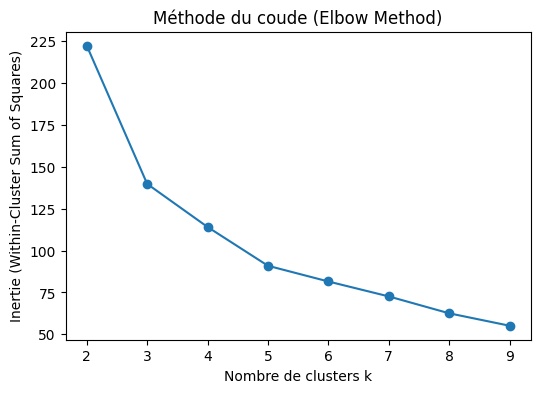

In [ ]:
# 6. Méthode du coude pour estimer un nombre optimal de clusters
inertia_values = []
k_values = range(2, 10)
for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_scaled)
    inertia_values.append(kmeans_test.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Méthode du coude (Elbow Method)")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.show()

In [ ]:
# 7. Clustering final avec K-Means (exemple : k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
# 8. Calcul du score de silhouette
score_silhouette = silhouette_score(X_scaled, clusters)
print(f"Score de silhouette (k={k_optimal}): {score_silhouette:.3f}")

Score de silhouette (k=3): 0.460


In [ ]:
# 9. Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

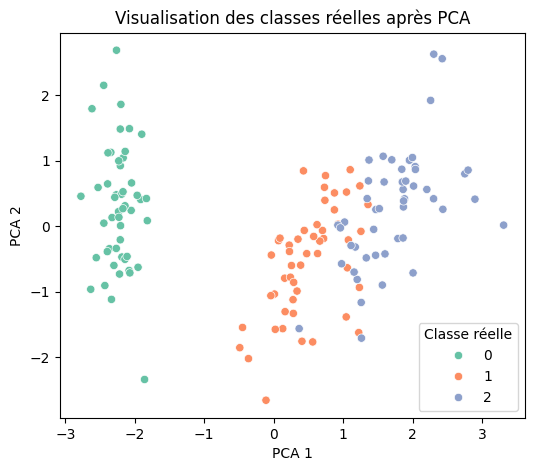

In [ ]:
# 11. (Optionnel) Visualisation selon les vraies classes (uniquement pour comparer)
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set2")
plt.title("Visualisation des classes réelles après PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Classe réelle")
plt.show()

In [ ]:
# 12. Comparaison par matrice de contingence (clusters vs labels réels)
contingency = pd.crosstab(y, clusters, rownames=["Classe réelle"], colnames=["Cluster K-Means"])
print("\nMatrice de contingence:")
display(contingency)


Matrice de contingence:


Cluster K-Means,0,1,2
Classe réelle,,,
0,0,50,0
1,39,0,11
2,14,0,36
